# Métodos Não-Paramétricos — k-NN e Árvores de Decisão

Nesta aula, vamos entender dois dos algoritmos mais populares em Machine Learning:  
**k-Nearest Neighbors (k-NN)** e **Árvores de Decisão**.

Antes disso, é importante compreender a diferença entre dois tipos de métodos:

---

##  Métodos Paramétricos

Métodos paramétricos são modelos que:

- **Assumem uma forma fixa** para o modelo (ex: linha reta).
- Aprendem **um número fixo de parâmetros** durante o treinamento.
- São geralmente **mais simples e rápidos**, mas **menos flexíveis**.

###  Exemplos:
- Regressão Linear
- Regressão Logística
- Naive Bayes

> Imagine que você sempre quer ajustar uma reta aos seus dados. Mesmo que os dados tenham forma de curva, o modelo tentará forçá-los em uma reta.

---

##  Métodos Não-Paramétricos

Métodos não-paramétricos **não assumem uma forma pré-definida** para o modelo.

- Eles aprendem **diretamente dos dados**.
- São **mais flexíveis**, podendo se adaptar a padrões complexos.
- Normalmente exigem **mais dados** e podem ser mais lentos.

###  Exemplos:
- k-Nearest Neighbors (k-NN)
- Árvores de Decisão
- Random Forest
- SVM

> Esses modelos se comportam mais como "memória": eles armazenam os dados de treino e usam esses dados para fazer predições quando um novo exemplo aparece.

---

##  Nesta aula...

Vamos estudar **dois métodos não-paramétricos muito importantes**:

-  **k-NN**: um algoritmo baseado em distância e votação.
-  **Árvores de Decisão**: modelos que aprendem regras de decisão em forma de perguntas binárias.

Vamos explorar a **intuição**, a **teoria leve**, e **exemplos práticos** com cada um desses modelos.


## k-Nearest Neighbors (k-NN)

O **k-NN (k-Nearest Neighbors)** é um dos algoritmos mais simples e intuitivos em Machine Learning.  
Ele não aprende uma fórmula ou modelo durante o treinamento. Em vez disso, ele **armazena os dados de treino** e, quando precisa fazer uma predição, **compara o novo exemplo com os dados que já conhece**.

---

### O que o k-NN faz?

> Para prever a classe de um novo exemplo, ele **procura os k exemplos mais próximos** (vizinhos) no conjunto de treino e decide pela **classe mais comum** entre esses vizinhos.

---

### Intuição:

Imagine que você esteja tentando classificar uma fruta desconhecida.  
Você tem uma tabela com frutas conhecidas, com características como **peso** e **doçura**.

Você pega a fruta desconhecida e procura na tabela as frutas **mais parecidas** com ela.

- Se a maioria das frutas parecidas for **maçã**, você diz que a nova também é uma maçã.
- Se a maioria for **laranja**, você diz que é uma laranja.

É assim que o k-NN funciona: **baseado em semelhança**.

---

### O que é "k"?

O **k** representa o número de vizinhos que vamos considerar.  
Por exemplo:
- **k = 1** → olhamos o vizinho mais próximo.
- **k = 3** → olhamos os 3 vizinhos mais próximos e fazemos uma votação.

> A escolha de k influencia o desempenho:  
> - k muito pequeno → o modelo pode ficar sensível a ruídos.  
> - k muito grande → o modelo pode ignorar detalhes importantes.

---

### Fundamento Matemático

A principal operação do k-NN é o **cálculo de distância** entre pontos.

A mais comum é a **distância Euclidiana**, que mede o quão "longe" dois pontos estão no espaço dos atributos:

\\[
d(x, x_i) = \\sqrt{(x_1 - x_{i1})^2 + (x_2 - x_{i2})^2 + \\dots + (x_n - x_{in})^2}
\\]

- \( x \): ponto novo que queremos classificar  
- \( x_i \): um ponto dos dados de treino  
- \( n \): número de atributos (ex: peso, altura, etc.)

> Quanto menor a distância, mais parecido o ponto é.

---

### Resumo:
- O k-NN **não aprende uma função**, apenas **compara** com os dados armazenados.
- Usa distância para medir **semelhança**.
- Decide com **base na maioria dos vizinhos mais próximos**.




In [1]:
# EXEMPLO KNN
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
# 1. Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target


In [7]:
# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# 3. Padronizar os dados (importante para k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# 4. Treinar o modelo k-NN com k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# 5. Fazer previsões
y_pred = knn.predict(X_test)

In [11]:
# 6. Avaliar o desempenho
print("Relatório de Classificação para k-NN (k=3):\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Relatório de Classificação para k-NN (k=3):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Árvores de Decisão

As **árvores de decisão** são modelos de aprendizado que tomam decisões através de **perguntas do tipo "sim" ou "não"**.

---

###  O que são?

Imagine uma série de perguntas que ajudam a tomar uma decisão, como:

1. Está chovendo?
   - Sim → Levo guarda-chuva
   - Não → Verifico a temperatura

2. Está frio?
   - Sim → Uso casaco
   - Não → Vou de camiseta

As **árvores de decisão funcionam exatamente assim**, só que com base em dados: elas **aprendem essas perguntas** a partir de exemplos.

---

## Intuição

O objetivo da árvore é **separar os dados em grupos mais "puros"**, ou seja, onde a maioria dos exemplos pertença à mesma classe.

Em cada divisão, a árvore faz uma pergunta como:

> "A idade é maior que 40 anos?"

e divide os dados em dois grupos:
- os que respondem "sim"
- os que respondem "não"

Mas como saber se essa pergunta é boa?

---

## Como a árvore escolhe as melhores perguntas?

Para isso, ela usa **medidas de impureza**. Vamos ver as três mais comuns:

---

###  1. Entropia

A **entropia** mede o **nível de desorganização ou mistura** das classes em um grupo.

####  Intuição:
- Se todos os exemplos do grupo são da mesma classe → entropia = 0 (grupo puro)
- Se o grupo tem 50% de cada classe → entropia = 1 (grupo bagunçado)

#### Fórmula:

$$
\text{Entropia}(S) = - (p_1 \cdot \log_2(p_1) + p_2 \cdot \log_2(p_2))
$$

Onde:
- $p_1$ e $p_2$ são as proporções das classes A e B, por exemplo.

### Expliando a Fórmula :

A fórmula é:

$$
\text{Entropia} = - (p_1 \cdot \log_2(p_1) + p_2 \cdot \log_2(p_2))
$$

- $p_1$ e $p_2$ são as proporções de cada classe no grupo.
- O $\log_2$ mede o **nível de surpresa**.
  - Se algo é bem provável ($p=1$), surpresa = 0
  - Se algo tem 50% de chance, surpresa = 1

---

### 2. Índice de Gini

O **Gini** também mede impureza, mas de forma um pouco diferente.

#### Intuição:
- Gini = 0 → grupo puro
- Gini ≈ 0.5 → grupo bem misturado

#### Fórmula:

$$
\text{Gini}(S) = 1 - (p_1^2 + p_2^2)
$$

Se temos 50% de cada classe:

$$
Gini = 1 - (0.5^2 + 0.5^2) = 0.5
$$

---

### 3. Ganho de Informação

O **ganho de informação** mede o **quanto a entropia caiu** depois de uma divisão.

#### Intuição:
Se antes a entropia era 1 (muito bagunçado), e depois da divisão caiu para 0.3, o ganho foi:

$$
IG = 1.0 - 0.3 = 0.7
$$

#### Fórmula geral:

$$
IG(S, A) = H(S) - \sum_{v \in \text{valores}(A)} \frac{|S_v|}{|S|} \cdot H(S_v)
$$

- $H(S)$ = entropia do grupo original  
- $H(S_v)$ = entropia de cada subgrupo após a divisão pelo atributo $A$

---

## O que a árvore faz?

1. Calcula a impureza do grupo (entropia ou Gini)
2. Testa todas as possíveis divisões (ex: “idade > 40?”)
3. Mede quanto a impureza caiu após cada divisão
4. Escolhe a pergunta que mais **organizou os dados**

---

## Resumo

| Conceito             | Intuição                                       |
|----------------------|------------------------------------------------|
| Entropia             | Mede a desorganização (bagunça)               |
| Gini                 | Mede a mistura das classes                     |
| Ganho de Informação  | Mede o quanto a bagunça foi reduzida           |
| O que a árvore faz   | Faz perguntas que deixam os grupos mais "puros"|




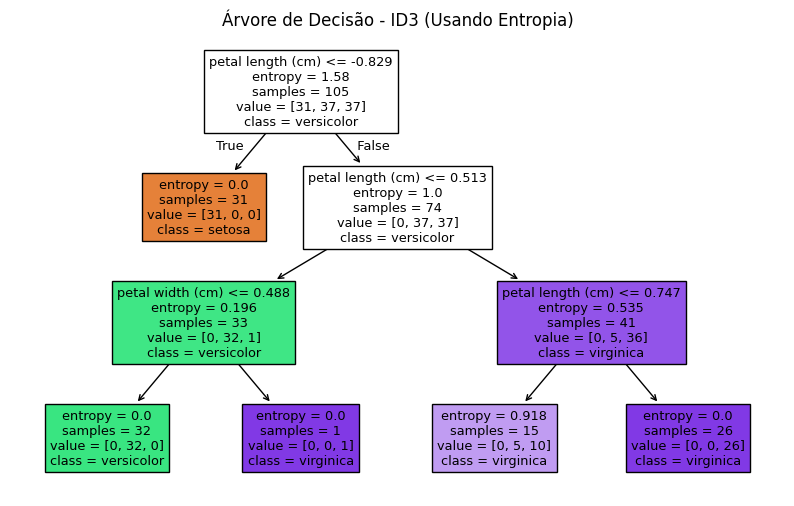

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# ID3 (Iterative Dichotomiser 3) é um dos primeiros algoritmos de árvore de decisão.
# Ele escolhe, a cada divisão, o atributo que mais reduz a entropia do grupo (ou seja, a "bagunça").
# A entropia mede o quão misturado está um grupo de classes. Quanto mais puro, melhor.

# No scikit-learn, usamos 'criterion="entropy"' para simular o ID3.
model_id3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model_id3.fit(X_train, y_train)

# Visualizar a árvore gerada
plt.figure(figsize=(10, 6))
plot_tree(model_id3, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árvore de Decisão - ID3 (Usando Entropia)")
plt.show()



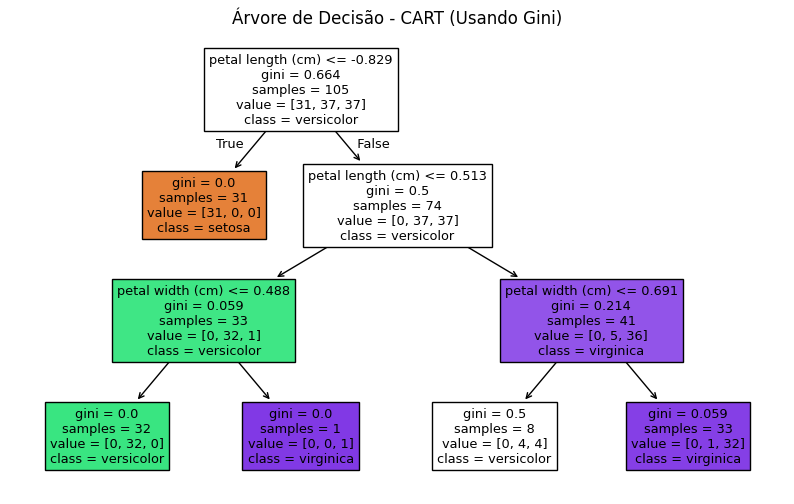

In [17]:
# CART (Classification and Regression Trees) é o algoritmo padrão usado no scikit-learn.
# Ele usa o índice de Gini em vez da entropia para medir a impureza de um grupo.
# A lógica é a mesma: fazer divisões que deixem os grupos o mais puro possível.
# Gini e entropia geralmente levam a árvores parecidas, mas Gini costuma ser um pouco mais rápido.

model_cart = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model_cart.fit(X_train, y_train)

# Visualizar a árvore gerada
plt.figure(figsize=(10, 6))
plot_tree(model_cart, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árvore de Decisão - CART (Usando Gini)")
plt.show()



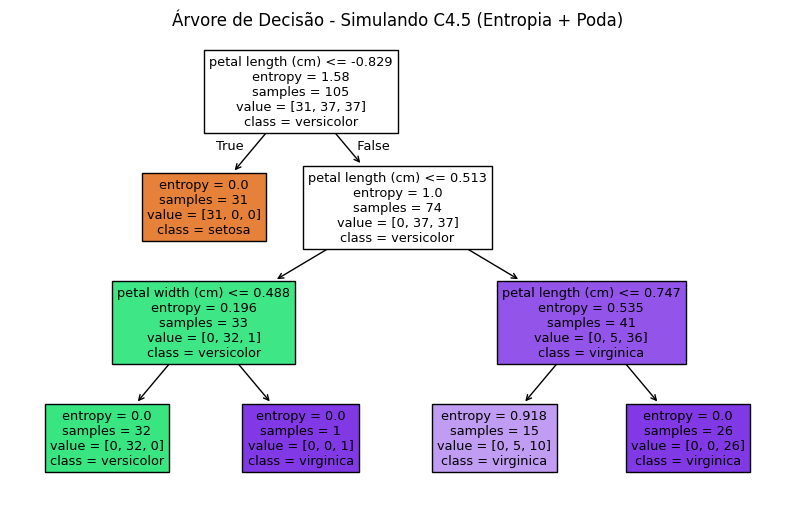

In [18]:
# O algoritmo C4.5 é uma evolução do ID3:
# - Também usa entropia como critério de divisão.
# - Introduz o conceito de 'Gain Ratio' (não está disponível no scikit-learn).
# - Permite trabalhar com atributos contínuos.
# - Faz PODA da árvore: evita que ela cresça demais e se torne complexa.

# Como o Gain Ratio não está implementado no scikit-learn, simulamos um comportamento parecido:
# Usamos 'entropy' + limitamos a profundidade + exigimos um número mínimo de exemplos por divisão.

model_c45 = DecisionTreeClassifier(
    criterion='entropy',  # mesma métrica que ID3
    max_depth=3,          # limita a complexidade da árvore
    min_samples_split=5,  # exige pelo menos 5 exemplos para dividir
    random_state=42
)
model_c45.fit(X_train, y_train)

# Visualizar a árvore gerada
plt.figure(figsize=(10, 6))
plot_tree(model_c45, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árvore de Decisão - Simulando C4.5 (Entropia + Poda)")
plt.show()


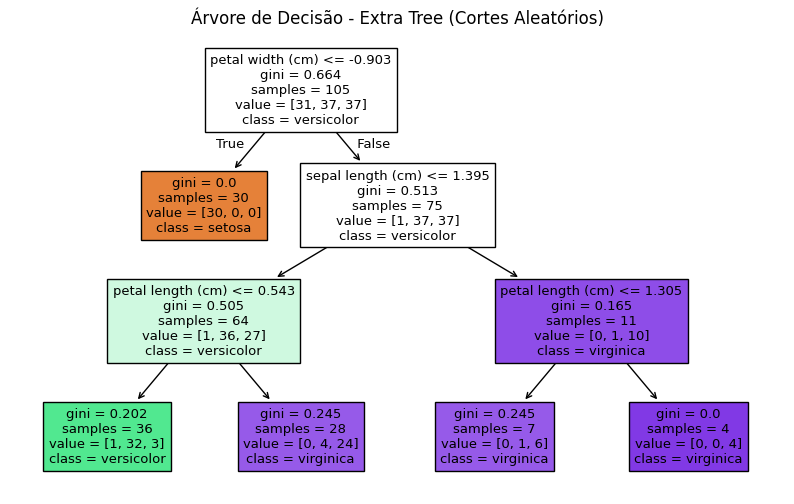

In [19]:
from sklearn.tree import ExtraTreeClassifier

# O ExtraTree (Extremely Randomized Tree) é uma variação que introduz mais aleatoriedade.
# Enquanto os outros algoritmos procuram pelo MELHOR ponto de corte, o ExtraTree escolhe pontos de forma aleatória.
# Isso faz com que ele seja mais rápido e gere mais diversidade entre árvores (muito útil para ensembles como Random Forest).

model_extra = ExtraTreeClassifier(max_depth=3, random_state=42)
model_extra.fit(X_train, y_train)

# Visualizar a árvore gerada
plt.figure(figsize=(10, 6))
plot_tree(model_extra, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árvore de Decisão - Extra Tree (Cortes Aleatórios)")
plt.show()


## Resumo das Diferenças entre os Algoritmos de Árvore de Decisão

Após explorarmos diferentes algoritmos de árvore, aqui está um resumo para ajudar a entender **como eles se comparam**:

| Algoritmo       | Critério de divisão       | Características principais                                                              |
|------------------|---------------------------|------------------------------------------------------------------------------------------|
| **ID3**          | Entropia                  | Escolhe o atributo que mais reduz a desorganização (entropia).                          |
| **CART**         | Índice de Gini            | Algoritmo padrão do scikit-learn. Simples e eficiente. Usado em árvores e Random Forest.|
| **C4.5 (simulado)** | Entropia + Poda        | Mais robusto que o ID3. Evita crescer demais. Usa "Gain Ratio" (não disponível no sklearn).|
| **Extra Tree**   | Cortes aleatórios         | Não procura o melhor corte: escolhe aleatoriamente. Mais rápido, útil em florestas.     |

---

### Dicas:

- **Entropia vs Gini**: Ambos medem "mistura" no grupo. Entropia é mais precisa, Gini é mais rápido.
- **ID3 vs CART**: ID3 usa entropia, CART usa Gini.
- **C4.5** é como um ID3 melhorado: permite dados contínuos, reduz overfitting.
- **ExtraTree** é ótimo quando queremos muitas árvores rápidas e diferentes (como no Random Forest).

---

### Quando usar cada um?

- **Problemas pequenos e interpretáveis** → Árvores simples com Gini ou Entropia.
- **Modelos de produção ou ensembles** → CART ou ExtraTree (pela velocidade).
- **Modelos explicativos com controle de complexidade** → C4.5 simulado (com poda).


